<a href="https://colab.research.google.com/github/AbdulxoliqMirzayev/Diabets_projeckt/blob/main/diabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Optimallashtirilgan 

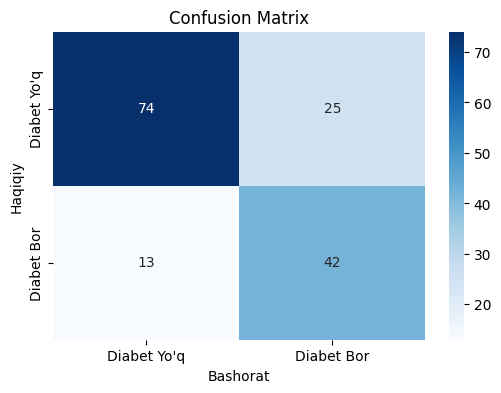

Modelning aniqlik darajasi: 75.32%


In [1]:
# Import qilinadigan kutubxonalar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv?raw=true"
df = pd.read_csv(url)


print(df.head())
print(df.isnull().sum())


X = df.drop('Outcome', axis=1)
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_balanced, y_train_balanced)

best_rf_model = grid_search.best_estimator_


y_pred = best_rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Optimallashtirilgan Random Forest aniqlik darajasi: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Diabet Yo\'q', 'Diabet Bor'],
            yticklabels=['Diabet Yo\'q', 'Diabet Bor'])
plt.xlabel('Bashorat')
plt.ylabel('Haqiqiy')
plt.title('Confusion Matrix')
plt.show()


y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelning aniqlik darajasi: {accuracy * 100:.2f}%")
